# Testing on Random Walk

## Training

In [2]:
!python checkpoint_trainer.py --niters 300 --batch-size 260 --dataset randomwalk --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 #--experiment-id 5650141

^C
Traceback (most recent call last):
  File "checkpoint_trainer.py", line 7, in <module>
    import models
  File "/home/gsasseville/Files/UDEM/Maitrise/SgrA/SgrA_Interpolation/Tripletformer/models.py", line 1, in <module>
    from tripletformer import TRIPLETFORMER
  File "/home/gsasseville/Files/UDEM/Maitrise/SgrA/SgrA_Interpolation/Tripletformer/tripletformer.py", line 5, in <module>
    import utils
  File "/home/gsasseville/Files/UDEM/Maitrise/SgrA/SgrA_Interpolation/Tripletformer/utils.py", line 5, in <module>
    from sklearn import model_selection
  File "/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/site-packages/sklearn/__init__.py", line 83, in <module>
    from .base import clone
  File "/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/site-packages/sklearn/base.py", line 19, in <module>
    from .utils import _IS_32BIT
  File "/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/si

## Predicting

In [1]:
!python test_prediction.py --batch-size 260 --dataset randomwalk --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 1551851

test_prediction.py --batch-size 260 --dataset randomwalk --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 1551851
(50000, 200, 9) (25000, 200, 9) (25000, 200, 9)
test_prediction.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `w

In [19]:
import numpy as np
tmp = np.array([13.34])

np.save('tmpfile.npy', tmp)

In [20]:
x = np.load('tmpfile.npy')
x[0]

13.34

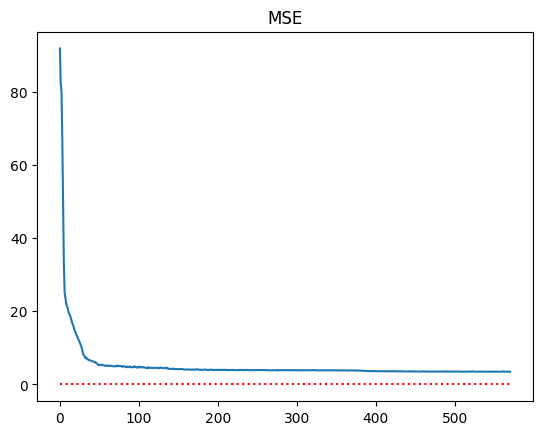

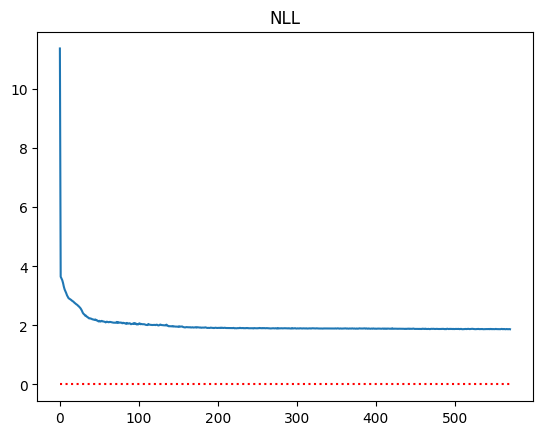

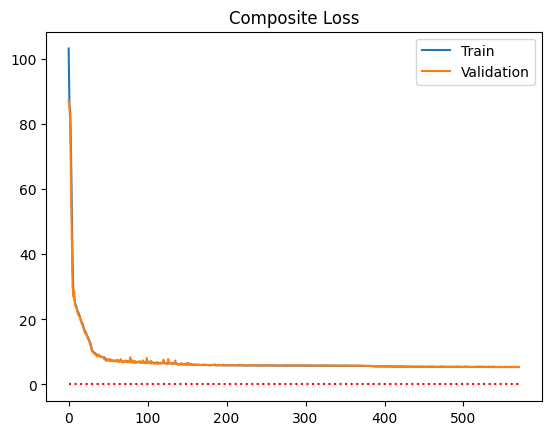

In [31]:
import numpy as np
import matplotlib.pyplot as plt

dataset = 'randomwalk'
experiment_id = '1551851'

metrics = np.load(f'./metrics/metrics_{dataset}_{experiment_id}.npz', allow_pickle=True)['metrics'].item()

train_loss = metrics['train']['loss']
train_nll = metrics['train']['nll']
train_mse = metrics['train']['mse']

val_loss = metrics['val']['loss']
val_nll = metrics['val']['nll']
val_mse = metrics['val']['mse']

x = np.arange(len(train_loss))


plt.plot(x, train_mse, label='mse')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('MSE')
plt.show()

plt.plot(x, train_nll, label='nll')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('NLL')
plt.show()

plt.plot(x, train_loss, label='Train')
plt.plot(x, val_loss, label='Validation')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.legend()
plt.title('Composite Loss')
plt.show()

# Testing on Full Data

## Training

In [5]:
!python checkpoint_trainer.py --niters 20000 --batch-size 20 --dataset sgra --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --max-early-stop 20000 --experiment-id 7173883

checkpoint_trainer.py --niters 20000 --batch-size 20 --dataset sgra --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --max-early-stop 20000 --experiment-id 7173883
(2460, 960, 9) (1230, 960, 9) (410, 960, 9)
/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
checkpoint_trainer.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flippe

## Predicting

In [31]:
!python test_prediction.py --niters 1 --batch-size 20 --dataset sgra --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 7173883

test_prediction.py --niters 1 --batch-size 20 --dataset sgra --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 7173883
(9810, 1440, 9) (4905, 1440, 9) (1635, 1440, 9)
test_prediction.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start settin

[   0    1    2 ... 5123 5124 5125]


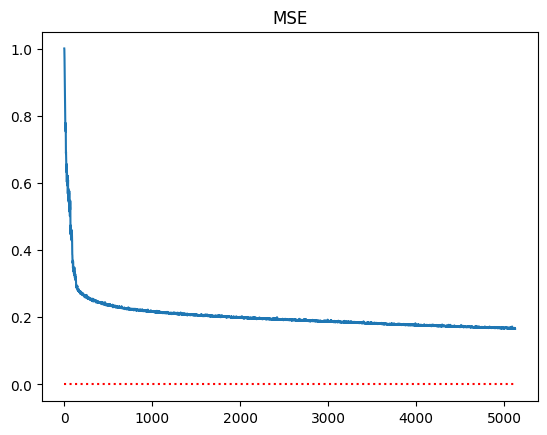

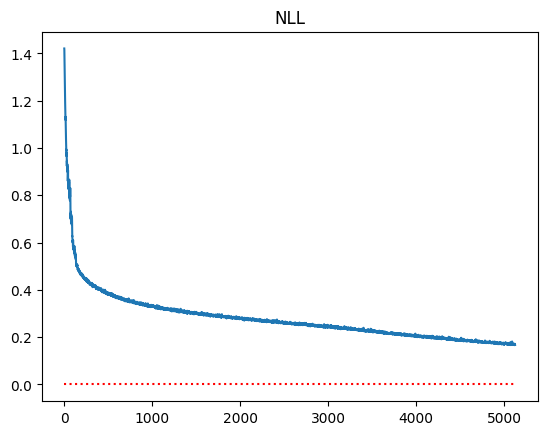

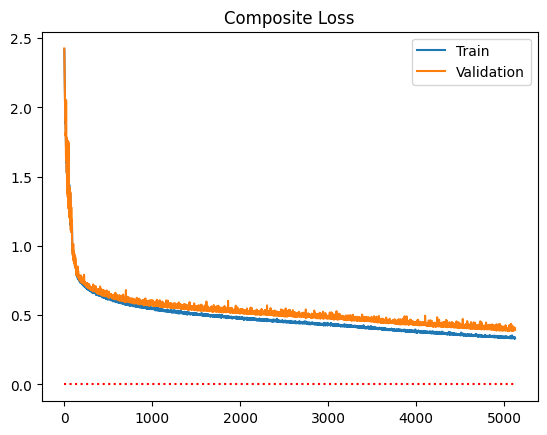

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataset = 'sgra'
experiment_id = '5832850'

metrics = np.load(f'./metrics/metrics_{dataset}_{experiment_id}.npz', allow_pickle=True)['metrics'].item()

train_loss = metrics['train']['loss']
train_nll = metrics['train']['nll']
train_mse = metrics['train']['mse']

val_loss = metrics['val']['loss']
val_nll = metrics['val']['nll']
val_mse = metrics['val']['mse']

x = np.arange(len(train_loss))

print(x)

plt.plot(x, train_mse, label='mse')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('MSE')
plt.show()

plt.plot(x, train_nll, label='nll')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('NLL')
plt.show()

plt.plot(x, train_loss, label='Train')
plt.plot(x, val_loss, label='Validation')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.legend()
plt.title('Composite Loss')
plt.show()

In [32]:
!python evaluate.py --niters 1 --batch-size 20 --dataset sgra --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 7173883

evaluate.py --niters 1 --batch-size 20 --dataset sgra --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 7173883
(9810, 1440, 9) (4905, 1440, 9) (1635, 1440, 9)
evaluate.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_onl

# Testing on Full Data Without X-ray

## Training

In [20]:
!python checkpoint_trainer.py --niters 200 --batch-size 50 --dataset noxray --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 7913271

checkpoint_trainer.py --niters 200 --batch-size 50 --dataset noxray --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128
(1200, 960, 7) (600, 960, 7) (200, 960, 7)
/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
No checkpoint file found. Training from Epoch 1
Experiment ID 7913271

Epoch 1 completed
Training loss: 0.9280
NLL: 0.7897
MSE: 0.1383
Validation loss: 0.6465

Epoch 2 completed
Training loss: 0.5076
NLL: 0.4560
MSE: 0.0517
Validation loss: 0.1419

Epoch 3 completed
Training loss: -0.0538
NLL: -0.1025
MSE: 0.0488
Validation loss: -0.1897

Epoch 4 completed
Training loss: -0.2326
NLL: -0.2809
MSE: 0.0483
Validation loss: -0.3637

Epoch 5 completed
Training loss: -0.3742
NLL: -0.4222
MSE: 

## Predicting

In [1]:
!python test_prediction.py --niters 1 --batch-size 60 --dataset noxray --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 1985165

test_prediction.py --niters 1 --batch-size 60 --dataset noxray --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 1985165
(2460, 960, 7) (1230, 960, 7) (410, 960, 7)
/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/site-packages/torch/cuda/__init__.py:106: UserWarning: 
NVIDIA GeForce RTX 4070 Laptop GPU with CUDA capability sm_89 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA GeForce RTX 4070 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))
Traceback (most recent call last):
  File "test_prediction.py", line 47, in <module>
    chp = torch.load(f'./saved_models/{a

# Testing on X-ray Only

## Training

In [44]:
!python checkpoint_trainer.py --niters 200 --batch-size 240 --dataset xray --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --max-early-stop 2 --experiment-id 8892948

checkpoint_trainer.py --niters 200 --batch-size 240 --dataset xray --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --max-early-stop 2 --experiment-id 8892948
(2460, 960, 3) (1230, 960, 3) (410, 960, 3)
/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
checkpoint_trainer.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to 

In [46]:
import numpy as np
tmp = np.load('metrics/best_val_loss_xray_8892948.npy')
tmp[0]

2.10398275096242

## Predicting

In [5]:
!python test_prediction.py --niters 1 --batch-size 240 --dataset xray --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 7692082

test_prediction.py --niters 1 --batch-size 240 --dataset xray --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 7692082
(1440, 960, 3) (720, 960, 3) (240, 960, 3)
test_prediction.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `w

In [47]:
print(len(val_loss))
print(val_loss)

72
[2.424342667184225, 2.424729864771773, 2.4238016082019342, 2.4237830348131135, 2.4236394893832323, 2.4235837343262463, 2.423527415205793, 2.4234617803154923, 2.4233857596792827, 2.4232608574192698, 2.4229442666216596, 2.4224036437709158, 2.421438333464832, 2.419528083103459, 2.413649838145186, 2.402508026216088, 2.3868879748553766, 2.3677021468557964, 2.3529100069185582, 2.334328128070366, 2.31763497213038, 2.2990966075804176, 2.2853424607253654, 2.2692951400105548, 2.2605804931826707, 2.2545792533130182, 2.252045520922033, 2.2457469672691532, 2.242660568981636, 2.2372070521843144, 2.2312407202836946, 2.2296576151033727, 2.237124780329262, 2.216656777916885, 2.2177155483059767, 2.2079334549787566, 2.2205486820965277, 2.1993786183799187, 2.2014883494958646, 2.196175482214951, 2.202499011667763, 2.19405204493825, 2.1791059214894366, 2.1747941040411227, 2.1704471285750224, 2.1709975498478586, 2.1663034369305865, 2.16104729001115, 2.1561125197061677, 2.1644132369902076, 2.15126275434726

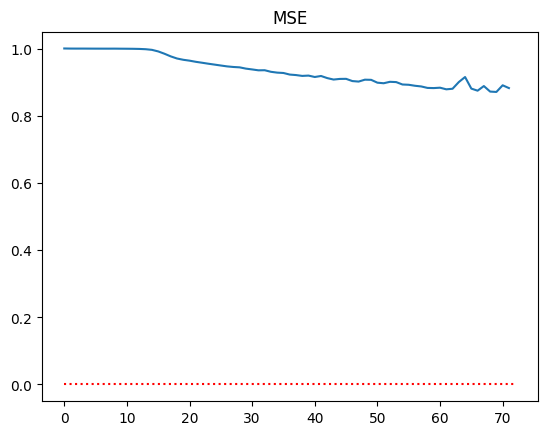

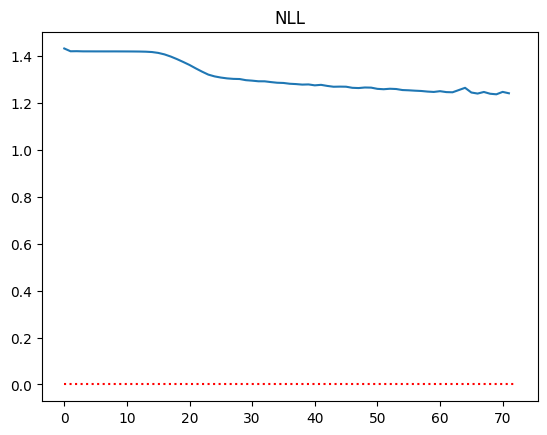

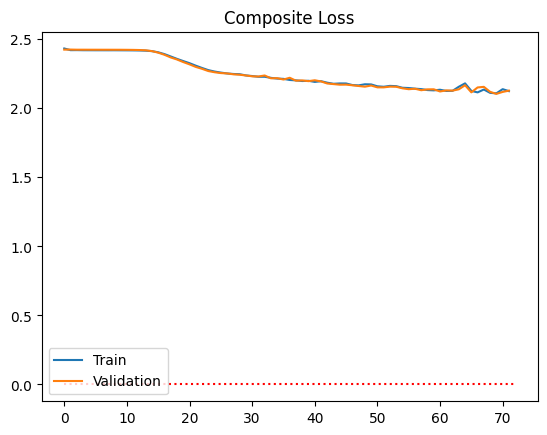

In [45]:
import numpy as np
import matplotlib.pyplot as plt

dataset = 'xray'
experiment_id = '8892948'

metrics = np.load(f'./metrics/metrics_{dataset}_{experiment_id}.npz', allow_pickle=True)['metrics'].item()

train_loss = metrics['train']['loss']
train_nll = metrics['train']['nll']
train_mse = metrics['train']['mse']

val_loss = metrics['val']['loss']
val_nll = metrics['val']['nll']
val_mse = metrics['val']['mse']

x = np.arange(len(train_loss))

plt.plot(x, train_mse, label='mse')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('MSE')
plt.show()

plt.plot(x, train_nll, label='nll')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('NLL')
plt.show()

plt.plot(x, train_loss, label='Train')
plt.plot(x, val_loss, label='Validation')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.legend()
plt.title('Composite Loss')
plt.show()

# Testing on No Mask Data

## Training

In [24]:
!python checkpoint_trainer.py --niters 200 --batch-size 30 --dataset nomask --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 1410565

checkpoint_trainer.py --niters 200 --batch-size 30 --dataset nomask --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128
(1200, 960, 9) (600, 960, 9) (200, 960, 9)
/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
No checkpoint file found. Training from Epoch 1
Experiment ID 1410565

Epoch 1 completed
Training loss: 0.7688
NLL: 0.6806
MSE: 0.0882
Validation loss: 0.3166

Epoch 2 completed
Training loss: -0.1420
NLL: -0.1748
MSE: 0.0328
Validation loss: -0.4812

Epoch 3 completed
Training loss: -0.5075
NLL: -0.5379
MSE: 0.0304
Validation loss: -0.6285

Epoch 4 completed
Training loss: -0.6627
NLL: -0.6927
MSE: 0.0300
Validation loss: -0.7864

Epoch 5 completed
Training loss: -0.8442
NLL: -0.8743
MS

## Predicting

In [7]:
!python test_prediction.py --niters 1 --batch-size 30 --dataset nomask --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 8068722

test_prediction.py --niters 1 --batch-size 30 --dataset nomask --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 8068722
(1440, 960, 9) (720, 960, 9) (240, 960, 9)
test_prediction.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `

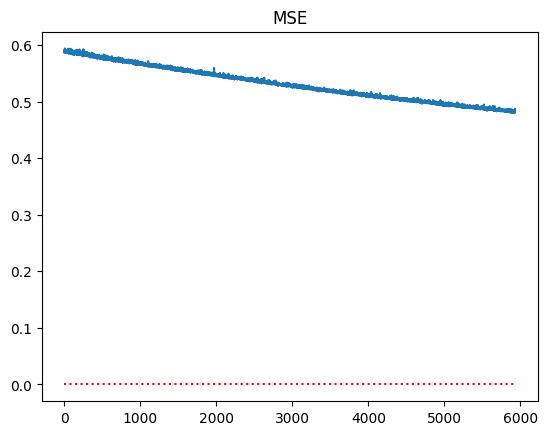

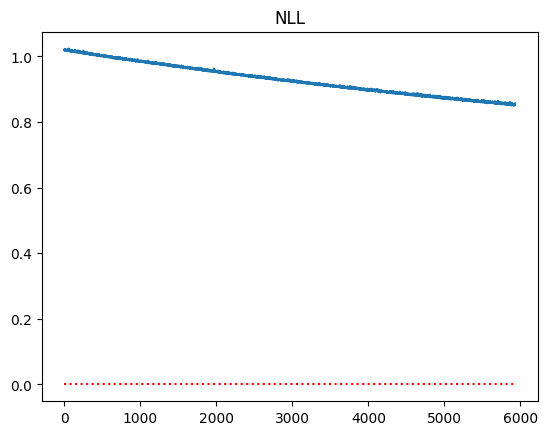

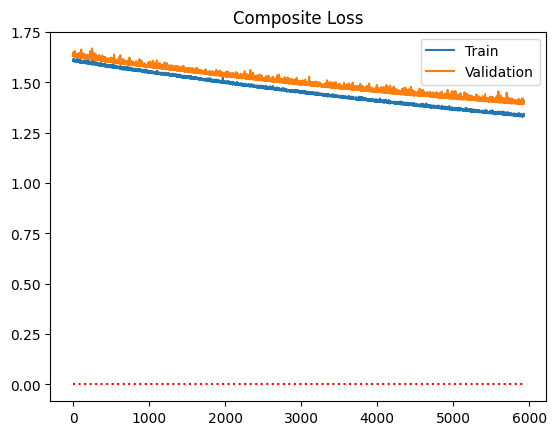

In [8]:
import numpy as np
import matplotlib.pyplot as plt

dataset = 'nomask'
experiment_id = '8068722'

metrics = np.load(f'./metrics/metrics_{dataset}_{experiment_id}.npz', allow_pickle=True)['metrics'].item()

train_loss = metrics['train']['loss']
train_nll = metrics['train']['nll']
train_mse = metrics['train']['mse']

val_loss = metrics['val']['loss']
val_nll = metrics['val']['nll']
val_mse = metrics['val']['mse']

x = np.arange(len(train_loss))

plt.plot(x, train_mse, label='mse')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('MSE')
plt.show()

plt.plot(x, train_nll, label='nll')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('NLL')
plt.show()

plt.plot(x, train_loss, label='Train')
plt.plot(x, val_loss, label='Validation')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.legend()
plt.title('Composite Loss')
plt.show()

# Testing on No Mask Data No X-ray

## Training

In [26]:
!python checkpoint_trainer.py --niters 200 --batch-size 50 --dataset noxray_no_mask --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 4171505

checkpoint_trainer.py --niters 200 --batch-size 50 --dataset noxray_no_mask --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128
(1200, 960, 7) (600, 960, 7) (200, 960, 7)
/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
No checkpoint file found. Training from Epoch 1
Experiment ID 4171505

Epoch 1 completed
Training loss: 0.7425
NLL: 0.6738
MSE: 0.0686
Validation loss: 0.5068

Epoch 2 completed
Training loss: 0.2626
NLL: 0.2216
MSE: 0.0411
Validation loss: -0.1948

Epoch 3 completed
Training loss: -0.1333
NLL: -0.1750
MSE: 0.0417
Validation loss: -0.3219

Epoch 4 completed
Training loss: -0.3503
NLL: -0.3900
MSE: 0.0397
Validation loss: -0.4818

Epoch 5 completed
Training loss: -0.5279
NLL: -0.5

## Predicting

In [9]:
!python test_prediction.py --niters 1 --batch-size 30 --dataset noxray_no_mask --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 9588185

test_prediction.py --niters 1 --batch-size 30 --dataset noxray_no_mask --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 9588185
(1440, 960, 7) (720, 960, 7) (240, 960, 7)
test_prediction.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start s

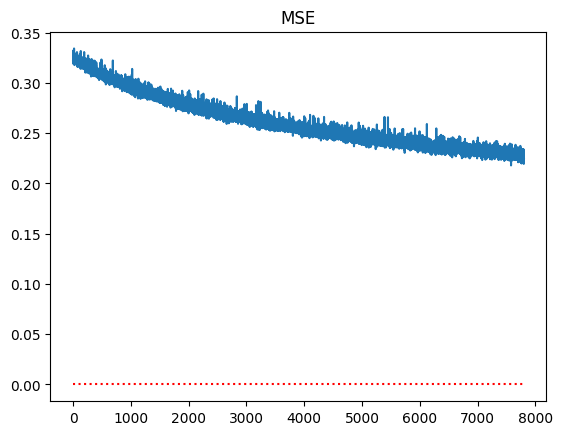

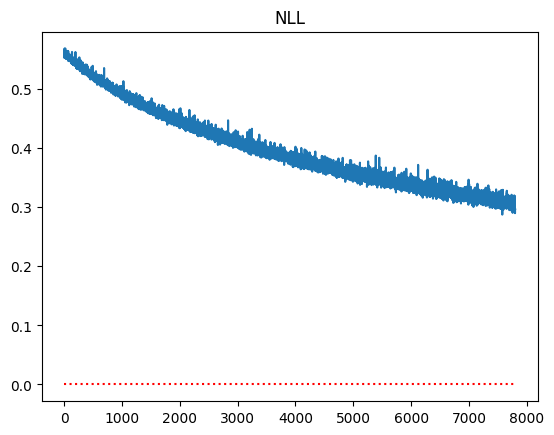

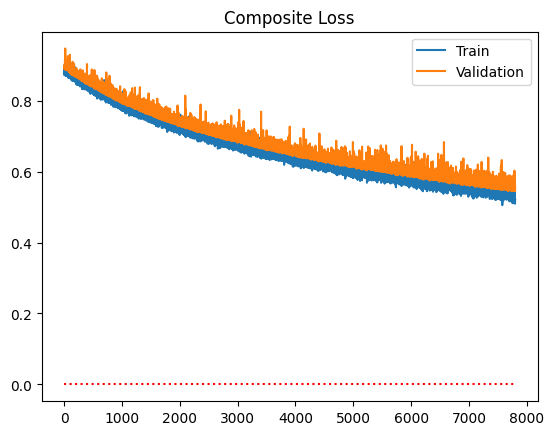

In [10]:
import numpy as np
import matplotlib.pyplot as plt

dataset = 'noxray_no_mask'
experiment_id = '9588185'

metrics = np.load(f'./metrics/metrics_{dataset}_{experiment_id}.npz', allow_pickle=True)['metrics'].item()

train_loss = metrics['train']['loss']
train_nll = metrics['train']['nll']
train_mse = metrics['train']['mse']

val_loss = metrics['val']['loss']
val_nll = metrics['val']['nll']
val_mse = metrics['val']['mse']

x = np.arange(len(train_loss))

plt.plot(x, train_mse, label='mse')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('MSE')
plt.show()

plt.plot(x, train_nll, label='nll')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('NLL')
plt.show()

plt.plot(x, train_loss, label='Train')
plt.plot(x, val_loss, label='Validation')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.legend()
plt.title('Composite Loss')
plt.show()

# Testing on No Mask Data 50% Noise

## Training

In [1]:
!python checkpoint_trainer.py --niters 200 --batch-size 30 --dataset nomask_50 --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 866620

checkpoint_trainer.py --niters 200 --batch-size 30 --dataset nomask_50 --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128
(1200, 960, 9) (600, 960, 9) (200, 960, 9)
/home/gsasseville/.local/share/virtualenvs/Tripletformer-nUF7tw2u/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
No checkpoint file found. Training from Epoch 1
Experiment ID 866620

Epoch 1 completed
Training loss: 0.6428
NLL: 0.5732
MSE: 0.0697
Validation loss: 0.1591

Epoch 2 completed
Training loss: -0.3048
NLL: -0.3361
MSE: 0.0313
Validation loss: -0.5290

Epoch 3 completed
Training loss: -0.6009
NLL: -0.6311
MSE: 0.0302
Validation loss: -0.7370

Epoch 4 completed
Training loss: -0.7879
NLL: -0.8180
MSE: 0.0301
Validation loss: -0.9277

Epoch 5 completed
Training loss: -1.0015
NLL: -1.0316


In [11]:
!python test_prediction.py --niters 1 --batch-size 30 --dataset nomask_50 --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 1141615

test_prediction.py --niters 1 --batch-size 30 --dataset nomask_50 --norm --shuffle --sample-tp 0.1 --mse-weight 1.0 --imab-dim 64 --cab-dim 256 --decoder-dim 128 --nlayers 1 --sample-type random --num-ref-points 128 --experiment-id 1141615
(1440, 960, 9) (720, 960, 9) (240, 960, 9)
test_prediction.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start settin

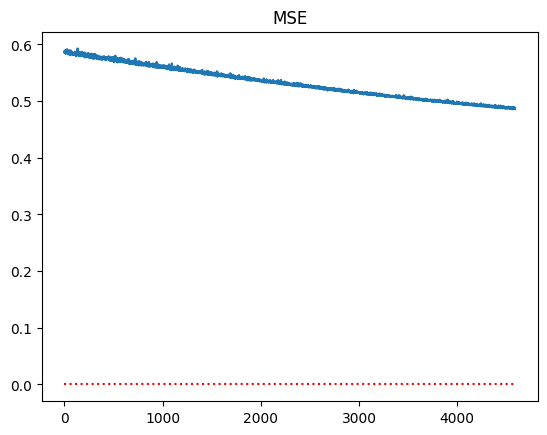

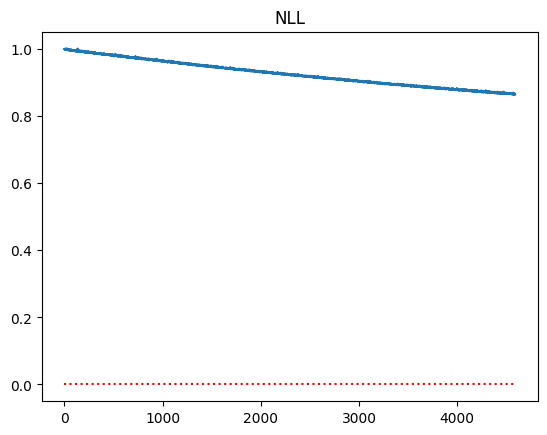

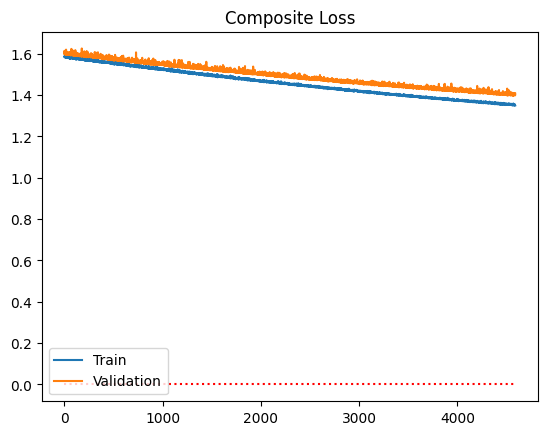

In [12]:
import numpy as np
import matplotlib.pyplot as plt

dataset = 'nomask_50'
experiment_id = '1141615'

metrics = np.load(f'./metrics/metrics_{dataset}_{experiment_id}.npz', allow_pickle=True)['metrics'].item()

train_loss = metrics['train']['loss']
train_nll = metrics['train']['nll']
train_mse = metrics['train']['mse']

val_loss = metrics['val']['loss']
val_nll = metrics['val']['nll']
val_mse = metrics['val']['mse']

x = np.arange(len(train_loss))

plt.plot(x, train_mse, label='mse')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('MSE')
plt.show()

plt.plot(x, train_nll, label='nll')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.title('NLL')
plt.show()

plt.plot(x, train_loss, label='Train')
plt.plot(x, val_loss, label='Validation')
plt.hlines(0, 0, len(x), colors='red', linestyles='dotted')
plt.legend()
plt.title('Composite Loss')
plt.show()